In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium


In [2]:
ispu = pd.read_excel("825230176 Data Bersih.xlsx", sheet_name="Sheet1")


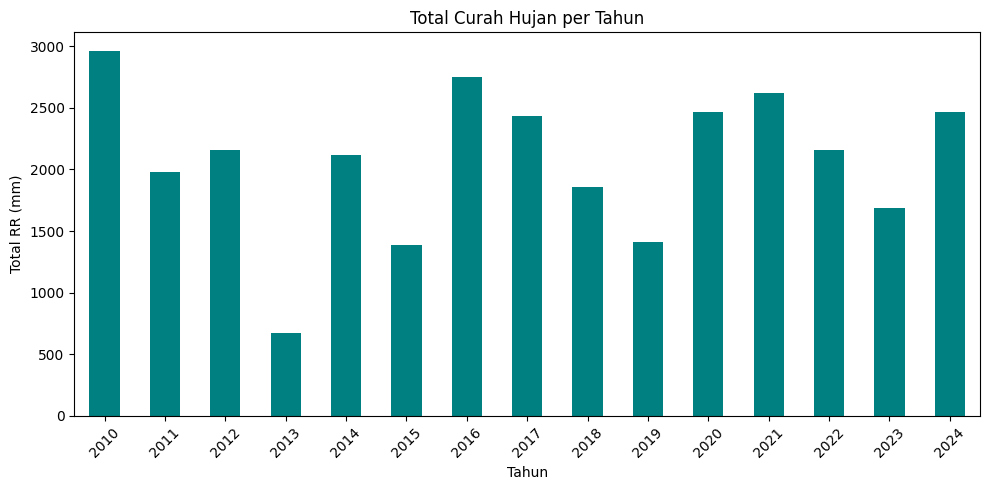

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "825230176 Data Bersih.xlsx"  
df = pd.read_excel(file_path)

df['Tanggal'] = pd.to_datetime(df['Tanggal'])

df['Tahun'] = df['Tanggal'].dt.year

total_rr = df.groupby('Tahun')['RR'].sum()

plt.figure(figsize=(10, 5))
total_rr.plot(kind='bar', color='teal')
plt.title('Total Curah Hujan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total RR (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


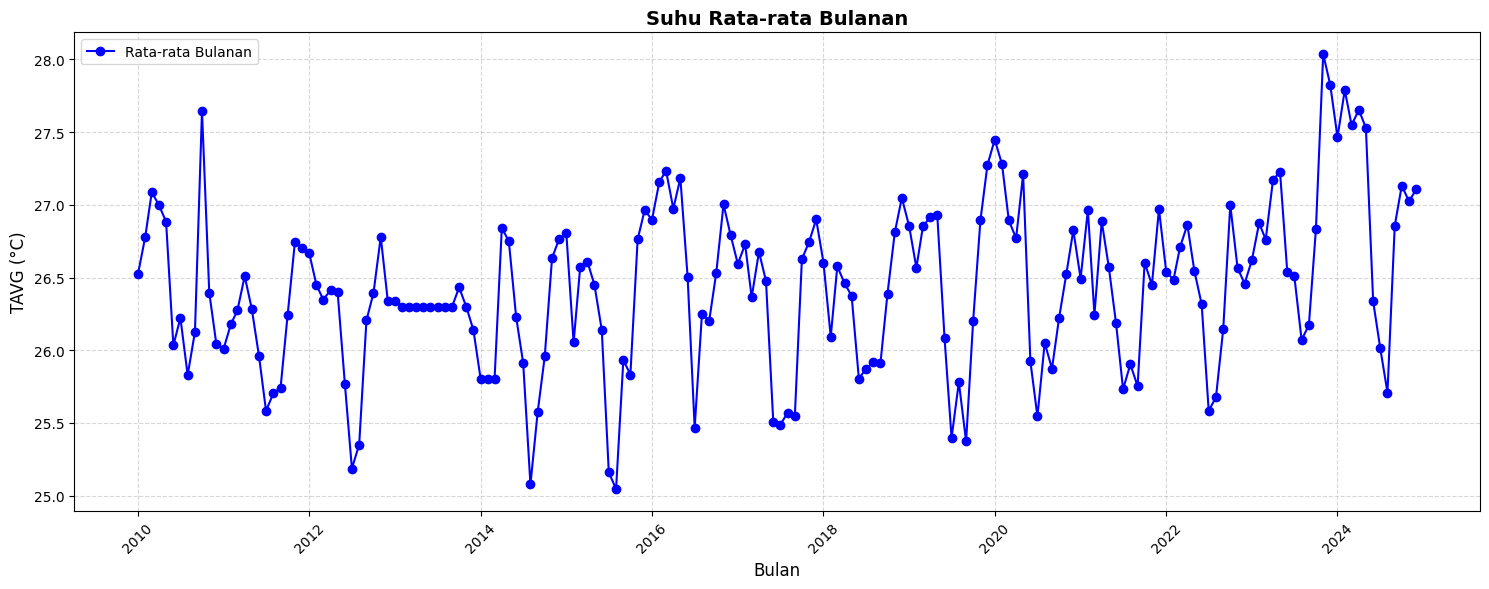

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("825230176 Data Bersih.xlsx")  
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

df['Bulan'] = df['Tanggal'].dt.to_period('M')
suhu_bulanan = df.groupby('Bulan')['TAVG'].mean().reset_index()
suhu_bulanan['Bulan'] = suhu_bulanan['Bulan'].dt.to_timestamp()

plt.figure(figsize=(15, 6))
plt.plot(suhu_bulanan['Bulan'], suhu_bulanan['TAVG'], label='Rata-rata Bulanan', color='blue', marker='o', linewidth=1.5)

plt.title("Suhu Rata-rata Bulanan", fontsize=14, fontweight='bold')
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("TAVG (°C)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Adit\AppData\Local\Temp\ipykernel_18812\403721516.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tahun', y='TAVG', data=df, palette='coolwarm', showfliers=True)


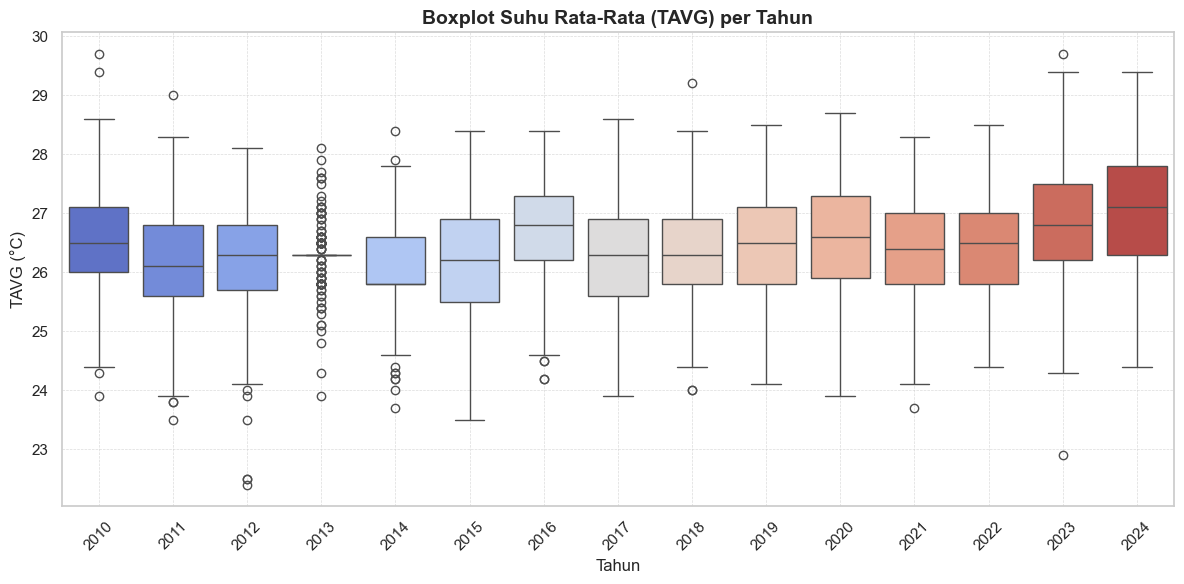

In [ ]:
df['Tahun'] = pd.to_datetime(df['Tanggal']).dt.year

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Tahun', y='TAVG', data=df, palette='coolwarm', showfliers=True)

plt.title('Boxplot Suhu Rata-Rata (TAVG) per Tahun', fontsize=14, fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('TAVG (°C)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Adit\AppData\Local\Temp\ipykernel_19528\1870939249.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tahun', y='RR', data=df, palette='Blues')


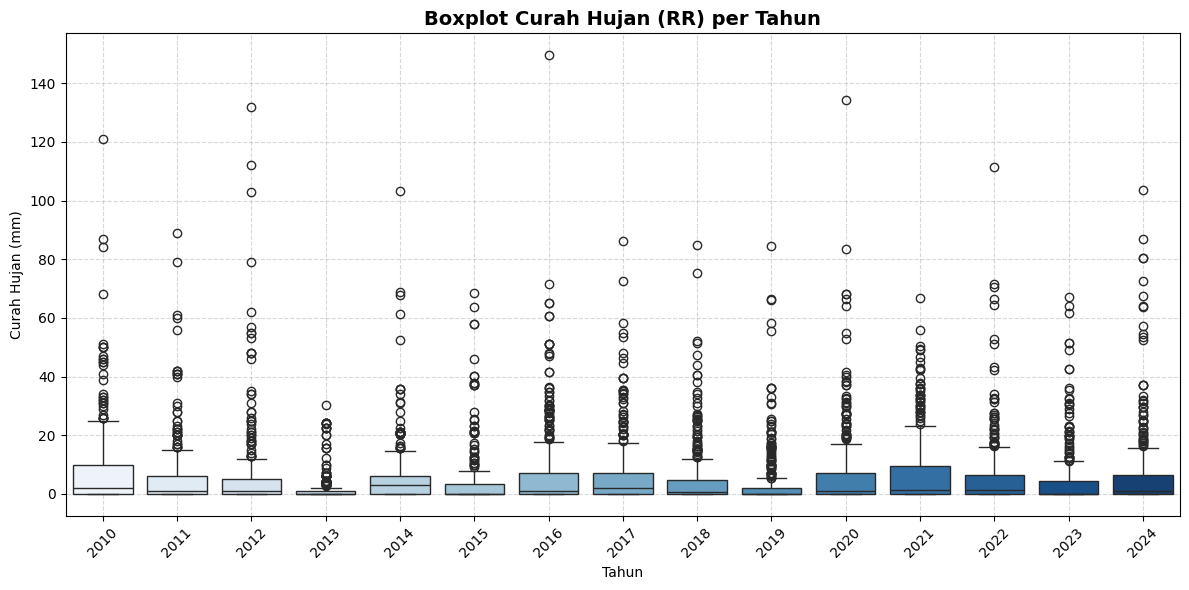

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.boxplot(x='Tahun', y='RR', data=df, palette='Blues')
plt.title('Boxplot Curah Hujan (RR) per Tahun', fontsize=14, fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


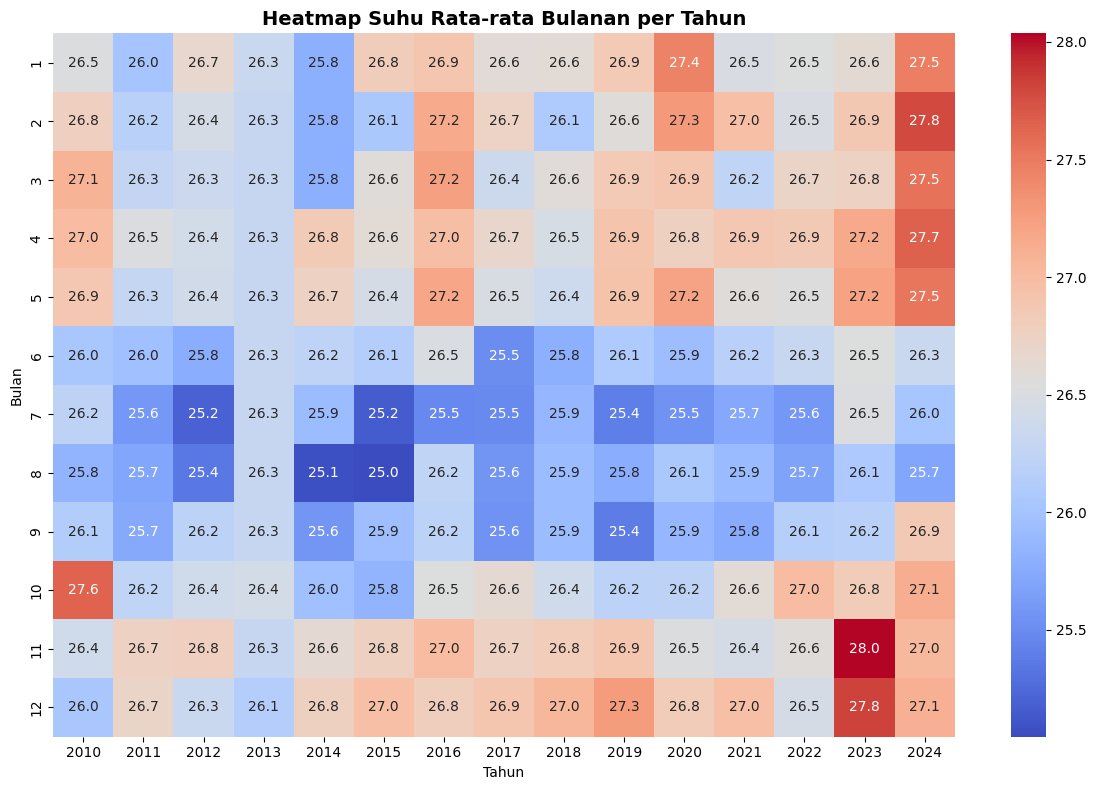

In [5]:
df['Bulan'] = df['Tanggal'].dt.month
pivot = df.pivot_table(index='Bulan', columns='Tahun', values='TAVG', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap Suhu Rata-rata Bulanan per Tahun', fontsize=14, fontweight='bold')
plt.ylabel('Bulan')
plt.xlabel('Tahun')
plt.tight_layout()
plt.show()


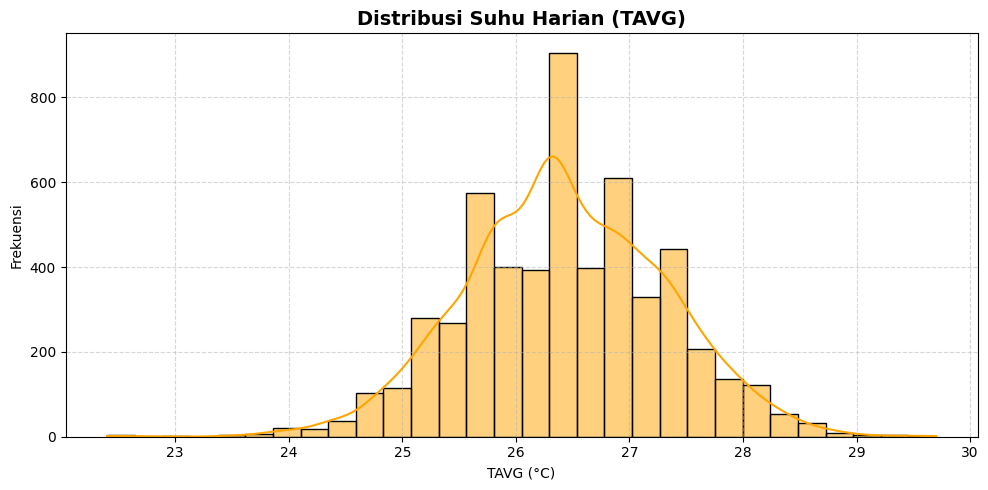

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TAVG'], bins=30, kde=True, color='orange')
plt.title('Distribusi Suhu Harian (TAVG)', fontsize=14, fontweight='bold')
plt.xlabel('TAVG (°C)')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


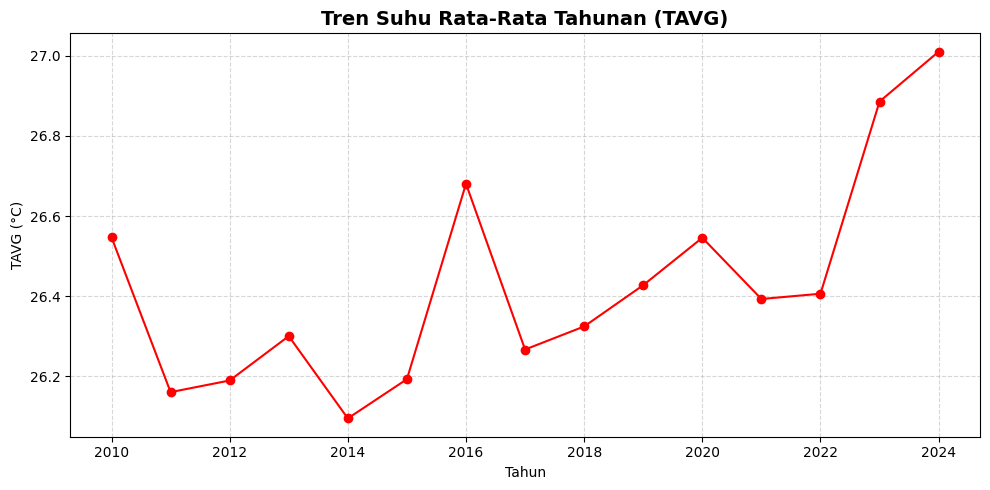

In [7]:
suhu_tahunan = df.groupby('Tahun')['TAVG'].mean()

plt.figure(figsize=(10, 5))
plt.plot(suhu_tahunan.index, suhu_tahunan.values, marker='o', color='red')
plt.title('Tren Suhu Rata-Rata Tahunan (TAVG)', fontsize=14, fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('TAVG (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


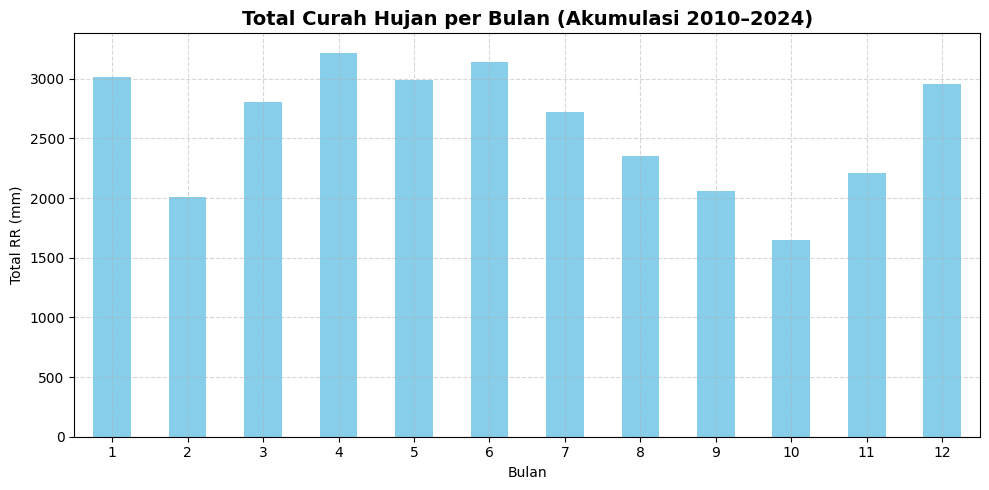

In [8]:
df['Bulan'] = df['Tanggal'].dt.month
rr_bulanan = df.groupby('Bulan')['RR'].sum()

plt.figure(figsize=(10, 5))
rr_bulanan.plot(kind='bar', color='skyblue')
plt.title('Total Curah Hujan per Bulan (Akumulasi 2010–2024)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total RR (mm)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


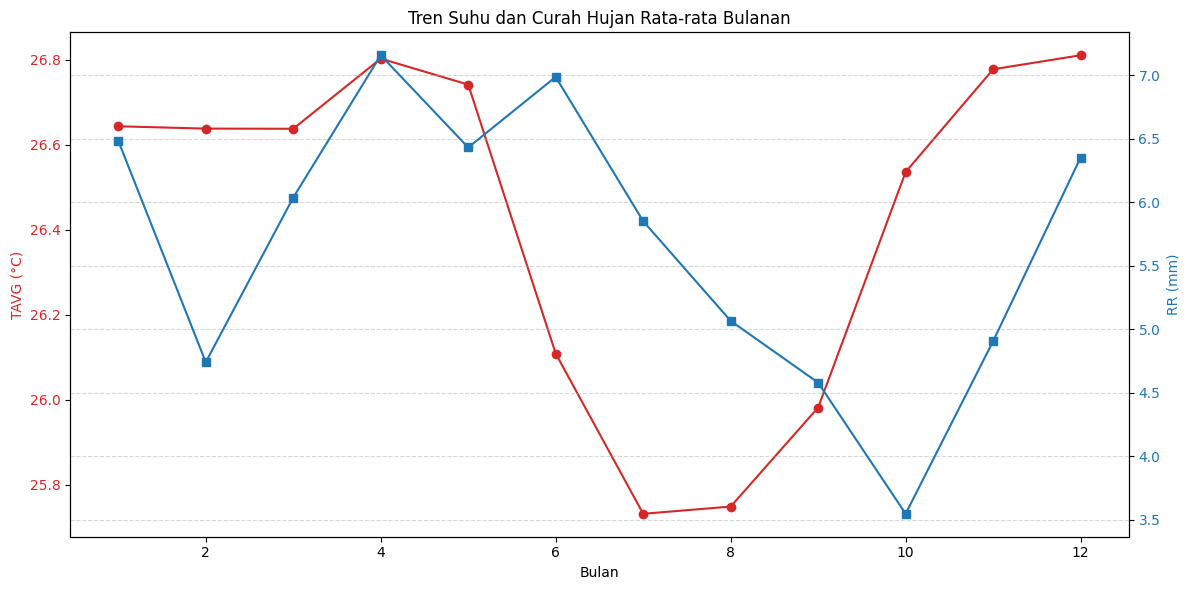

In [9]:
suhu_rr_bulanan = df.groupby('Bulan')[['TAVG', 'RR']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Bulan')
ax1.set_ylabel('TAVG (°C)', color=color)
ax1.plot(suhu_rr_bulanan.index, suhu_rr_bulanan['TAVG'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('RR (mm)', color=color)
ax2.plot(suhu_rr_bulanan.index, suhu_rr_bulanan['RR'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tren Suhu dan Curah Hujan Rata-rata Bulanan')
plt.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


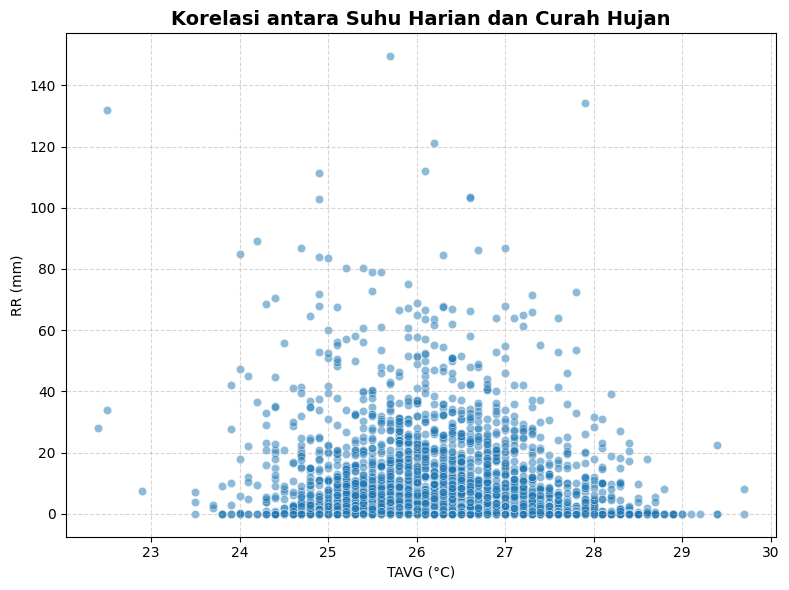

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TAVG', y='RR', alpha=0.5)
plt.title('Korelasi antara Suhu Harian dan Curah Hujan', fontsize=14, fontweight='bold')
plt.xlabel('TAVG (°C)')
plt.ylabel('RR (mm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
